In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

DATA_DIR = Path("data/").resolve()

In [3]:
training_set = pd.read_csv(DATA_DIR / "training_set.csv", delimiter=",")

# Fix outliers. Looks like an error in data entry

training_set.loc[training_set.D3D > 10000, "D3D"] = training_set.D3D / 1000
training_set.loc[training_set.D2D > 10000, "D2D"] = training_set.D2D / 1000
training_set.loc[training_set.AZ > 1000, "AZ"] = training_set.AZ / 1000

training_set.head()

,ID_FILA,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,DZ,AZ,#_BARRERAS,LINEAMIENTO,WHP_i,delta_WHP,ESTADO
0,1,Pozo 81-Pozo 22-37,Campo D,OIL,PAD-47,Pozo 81,37,Pozo 22,1323.623144,1323.212672,32.961374,199.623188,0.0,NO,-0.2,0.0,Abierto
1,2,Pozo 132-Pozo 112-10,Campo C,GAS,PAD-19,Pozo 132,10,Pozo 112,1184.248919,1184.233308,6.080755,345.025732,0.0,NO,-0.1,0.0,Abierto
2,3,Pozo 133-Pozo 112-21,Campo C,GAS,PAD-19,Pozo 133,21,Pozo 112,847.811857,847.771101,8.312941,342.171963,0.0,NO,-0.1,0.0,Abierto
3,4,Pozo 478-Pozo 122-6,Campo C,GAS,PAD-21,Pozo 478,6,Pozo 122,625.328398,625.314697,4.139460,259.131395,1.0,NO,-0.1,0.0,Abierto
4,5,Pozo 405-Pozo 242-19,Campo F,OIL,PAD-60,Pozo 405,19,Pozo 242,1118.214531,1118.074170,17.716903,90.993004,3.0,NO,-0.1,0.0,Abierto


In [4]:
import seaborn as sns

In [5]:
pd.DataFrame(
    training_set.delta_WHP.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999])
).T

,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
delta_WHP,26178.0,1.375667,7.573975,-90.0,-8.3646,0.0,0.0,0.0,0.0,0.0,1.1,7.1,13.2,101.0699,212.8


<AxesSubplot:xlabel='WHP_i', ylabel='delta_WHP'>

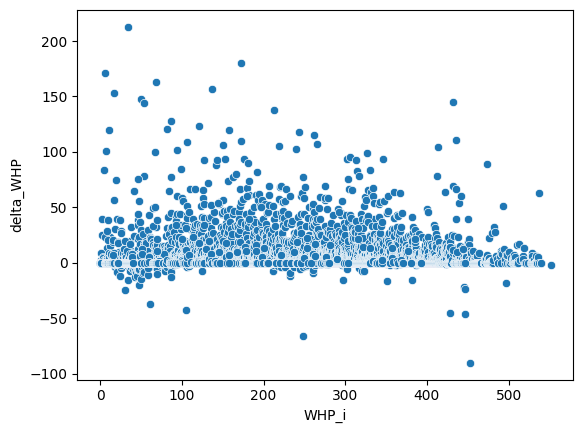

In [6]:
sns.scatterplot(
    data=training_set,
    x="WHP_i", y="delta_WHP"
)

## Variables categóricas

Algunas tienen una cardinalidad altísima. Tengo que reducirlas. Explican el target?

### LINEAMIENTO

Hay 25.6k de observaciones SIN lineamiento, solo 561 CON... El volumen es muy bajo y encima los valores no son significativos.

In [7]:
pd.DataFrame(
    [
        training_set.loc[training_set.LINEAMIENTO == "SI", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.LINEAMIENTO == "NO", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.LINEAMIENTO == "SI", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.LINEAMIENTO == "NO", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
    ]
)

,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
delta_WHP,561.0,2.786988,9.573740,0.0,0.000,0.0,0.0,0.0,0.0,0.0,7.70,18.2,31.66,77.0320,78.6
delta_WHP,25617.0,1.344759,7.521509,-90.0,-8.592,0.0,0.0,0.0,0.0,0.0,1.00,6.8,12.70,101.3384,212.8
WHP_i,561.0,99.322282,102.062978,-0.2,-0.200,1.4,8.2,34.2,60.3,132.7,265.80,338.5,359.68,445.8280,446.5
WHP_i,25617.0,140.572737,128.570794,-0.4,-0.200,8.1,18.4,41.2,84.9,238.9,348.04,395.5,411.10,528.6000,551.8


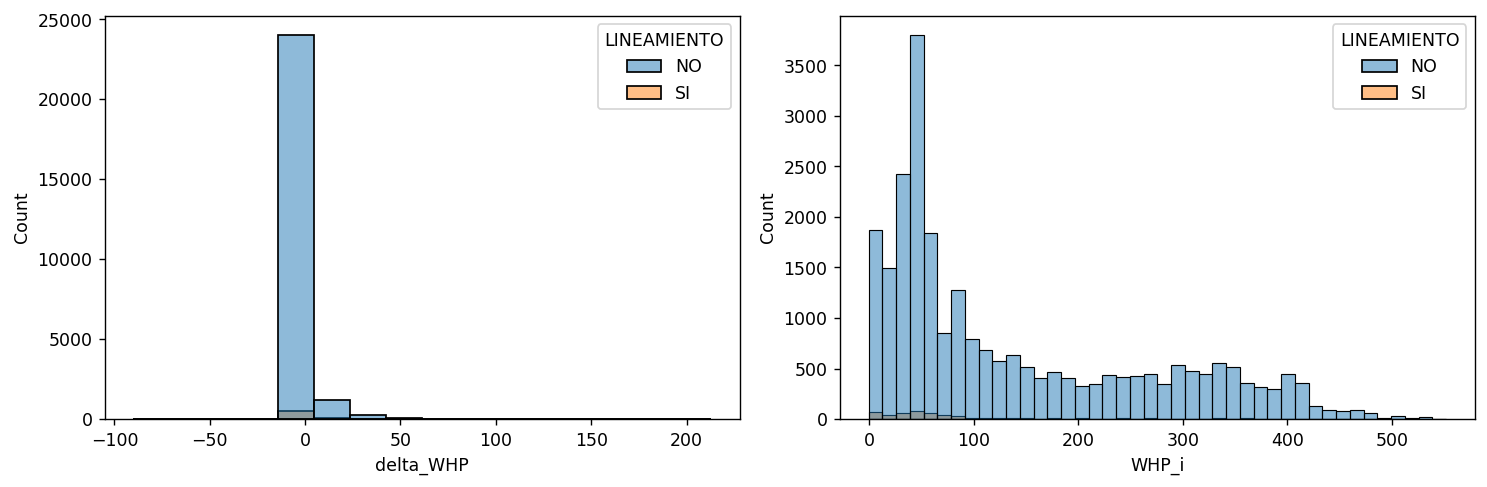

In [8]:
fig, axs = plt.subplots(ncols=2, **{"figsize": (12, 4), "dpi": 125, "facecolor": "white"})

sns.histplot(data=training_set, x="delta_WHP", hue="LINEAMIENTO", ax=axs[0])
sns.histplot(data=training_set, x="WHP_i", hue="LINEAMIENTO", ax=axs[1])

plt.tight_layout()

### ESTADO

Hay 17.2k de observaciones en estado ABIERTO y 8.9k en estado CERRADO. Ambos tienen data significativa...

In [9]:
pd.DataFrame(
    data=[
        training_set.loc[training_set.ESTADO == "Abierto", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.ESTADO == "Cerrado", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.ESTADO == "Abierto", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.ESTADO == "Cerrado", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
    ],
    index=pd.MultiIndex.from_tuples([
        ("Abierto", "delta_WHP"),
        ("Cerrado", "delta_WHP"),
        ("Abierto", "WHP_i"),
        ("Cerrado", "WHP_i"),
    ], names=("set", "feature"))
)

,,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
set,feature,,,,,,,,,,,,,,,
Abierto,delta_WHP,17280.0,0.069091,2.085642,-42.7,-7.5721,0.000,0.0,0.0,0.00,0.000,0.00,0.000,0.000,17.6815,180.6
Cerrado,delta_WHP,8898.0,3.913048,12.271043,-90.0,-16.1163,0.000,0.0,0.0,0.00,1.700,11.10,22.515,33.518,128.5815,212.8
Abierto,WHP_i,17280.0,114.958490,115.423863,-0.2,0.0000,12.700,22.6,39.2,56.60,159.000,325.40,374.400,398.500,436.1721,464.5
Cerrado,WHP_i,8898.0,187.715093,137.789299,-0.4,-0.3000,2.685,9.2,69.4,169.15,301.375,378.39,419.305,453.309,534.1515,551.8


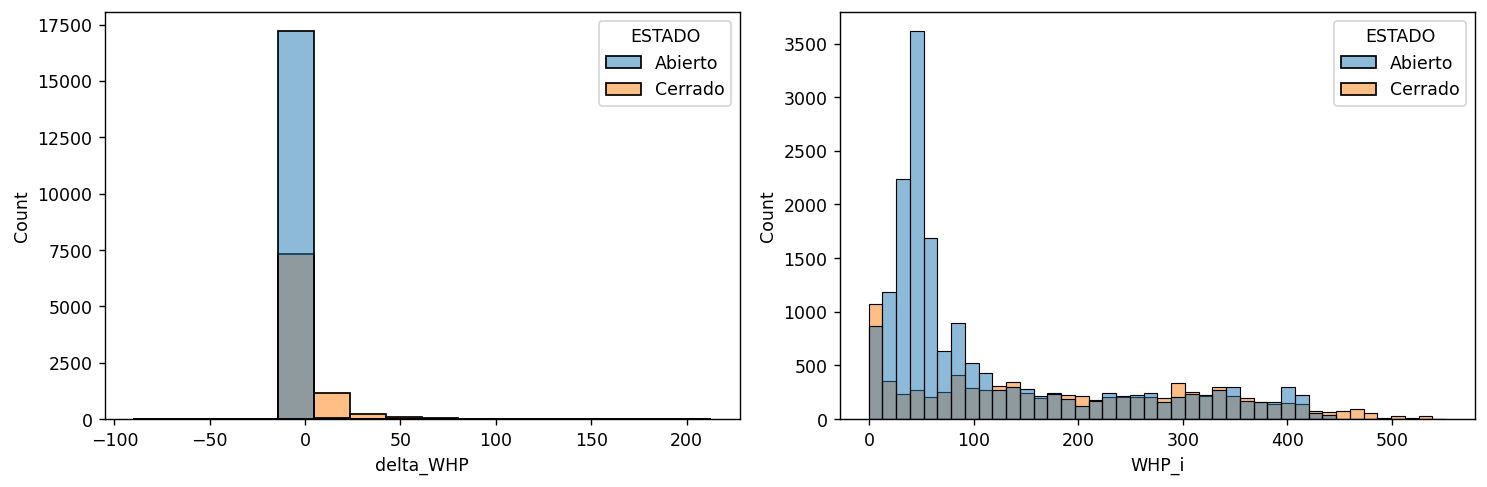

In [10]:
fig, axs = plt.subplots(ncols=2, **{"figsize": (12, 4), "dpi": 125, "facecolor": "white"})

sns.histplot(data=training_set, x="delta_WHP", hue="ESTADO", ax=axs[0])
sns.histplot(data=training_set, x="WHP_i", hue="ESTADO", ax=axs[1])

plt.tight_layout()

### FLUIDO

In [11]:
pd.DataFrame(
    data=[
        training_set.loc[training_set.FLUIDO == "OIL", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.FLUIDO == "GAS", "delta_WHP"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.FLUIDO == "OIL", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.loc[training_set.FLUIDO == "GAS", "WHP_i"].describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
    ],
    index=pd.MultiIndex.from_tuples([
        ("OIL", "delta_WHP"),
        ("GAS", "delta_WHP"),
        ("OIL", "WHP_i"),
        ("GAS", "WHP_i"),
    ], names=("set", "feature"))
)

,,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
set,feature,,,,,,,,,,,,,,,
OIL,delta_WHP,19974.0,1.530124,7.771231,-65.7,-7.6054,0.0,0.0,0.0,0.0,0.000,1.9,8.40,14.800,101.3027,212.8
GAS,delta_WHP,6204.0,0.878385,6.877775,-90.0,-15.7782,0.0,0.0,0.0,0.0,0.000,0.0,2.10,6.582,93.8188,180.6
OIL,WHP_i,19974.0,106.748808,108.799251,-0.4,-0.2000,7.0,13.8,36.2,55.4,147.400,299.8,348.00,366.600,456.7108,461.1
GAS,WHP_i,6204.0,245.739990,128.444788,-0.1,0.0000,48.2,83.7,136.0,252.0,351.175,408.4,434.47,463.900,535.6767,551.8


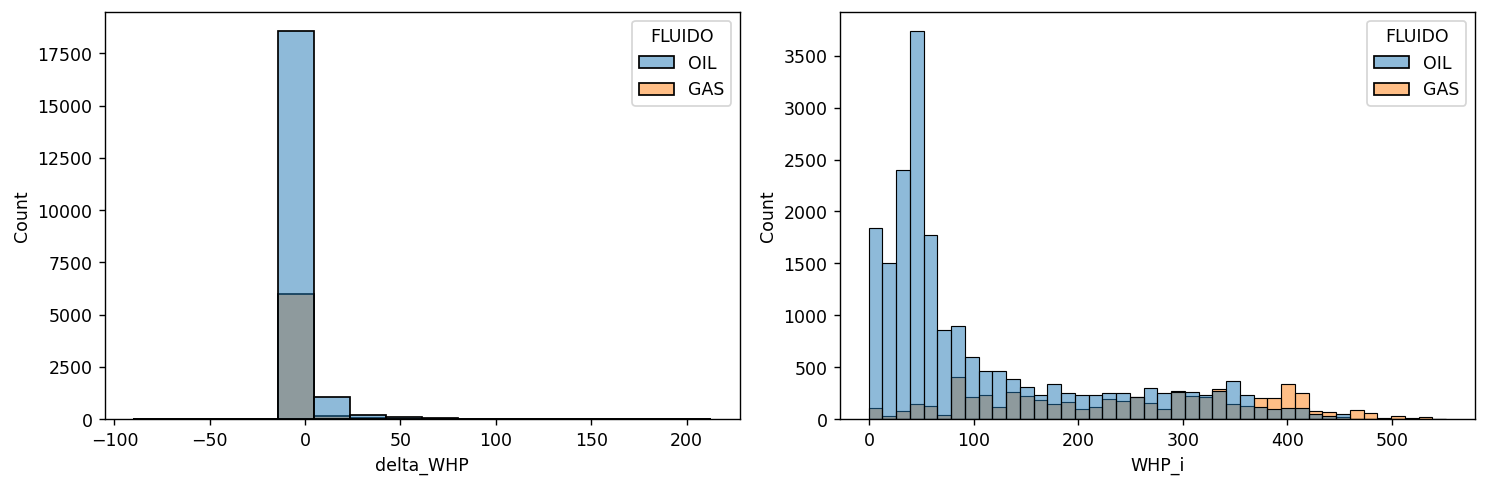

In [12]:
fig, axs = plt.subplots(ncols=2, **{"figsize": (12, 4), "dpi": 125, "facecolor": "white"})

sns.histplot(data=training_set, x="delta_WHP", hue="FLUIDO", ax=axs[0])
sns.histplot(data=training_set, x="WHP_i", hue="FLUIDO", ax=axs[1])

plt.tight_layout()

## DISTANCIAS

### D3D

In [13]:
pd.DataFrame(
    data=[
        training_set.D3D.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.D2D.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.DZ.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        training_set.AZ.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
    ],
)

,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
D3D,26178.0,992.506107,387.149708,70.626349,88.401379,299.511455,418.590261,712.519515,1040.069202,1311.902422,1490.881832,1542.056658,1566.857612,1615.367494,1981.235356
D2D,26178.0,991.567312,388.033233,20.219536,46.130238,299.034376,415.694485,711.821353,1039.317981,1311.552139,1490.506753,1541.633028,1566.583282,1615.342321,1981.186446
DZ,26178.0,16.018874,30.351291,-59.984196,-59.122995,-34.193848,-18.540287,-4.570704,13.179981,38.114759,55.224626,65.723220,74.085821,106.204419,196.058428
AZ,26178.0,186.990381,100.743774,0.029378,0.439880,28.445715,54.894196,90.467178,201.234030,271.381243,309.118097,332.294582,343.014934,359.599844,359.998020


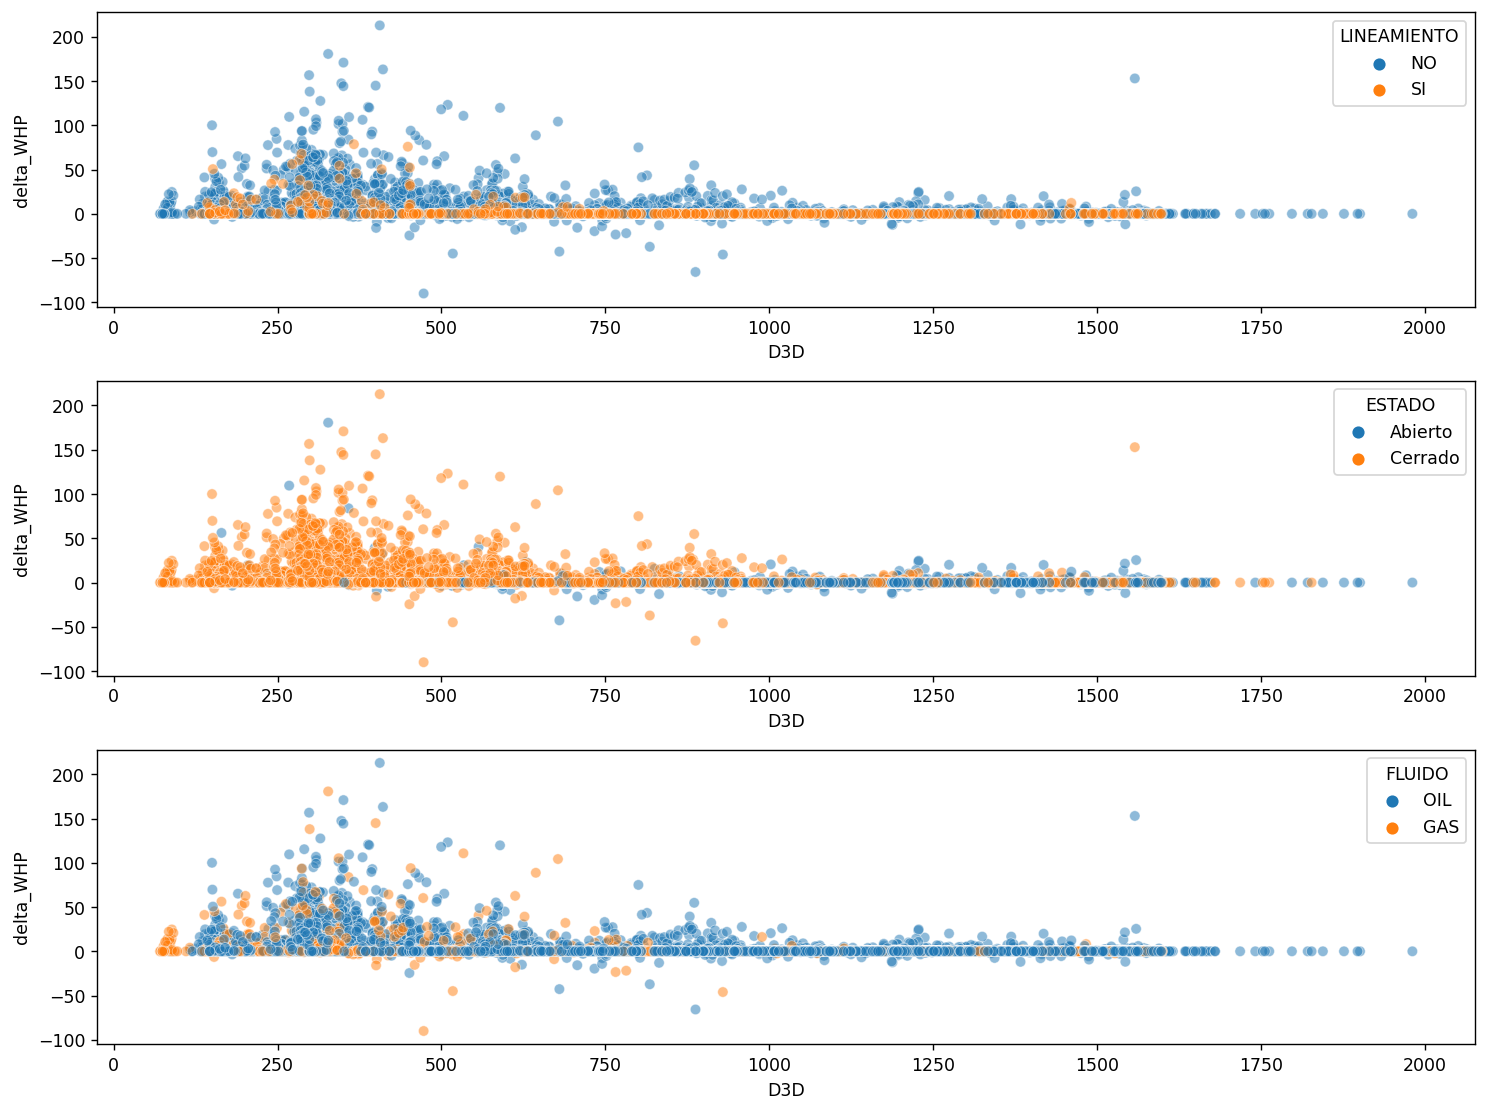

In [14]:
fig, axs = plt.subplots(nrows=3, **{"figsize": (12, 9), "dpi": 125, "facecolor": "white"})

sns.scatterplot(x='D3D', y='delta_WHP', hue="LINEAMIENTO", data=training_set, ax=axs[0], alpha=0.5)
sns.scatterplot(x='D3D', y='delta_WHP', hue="ESTADO", data=training_set, ax=axs[1], alpha=0.5)
sns.scatterplot(x='D3D',y='delta_WHP', hue="FLUIDO", data=training_set, ax=axs[2], alpha=0.5)

plt.tight_layout()

In [15]:
training_set["my_D3D"] = np.sqrt(training_set["D2D"]**2 + training_set["DZ"]**2)

In [16]:
import math

training_set["match"] = training_set[["my_D3D", "D3D"]].apply(lambda d: math.isclose(d["my_D3D"], d["D3D"]), axis=1)

training_set[~training_set["match"]]

,ID_FILA,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,DZ,AZ,#_BARRERAS,LINEAMIENTO,WHP_i,delta_WHP,ESTADO,my_D3D,match


### DZ

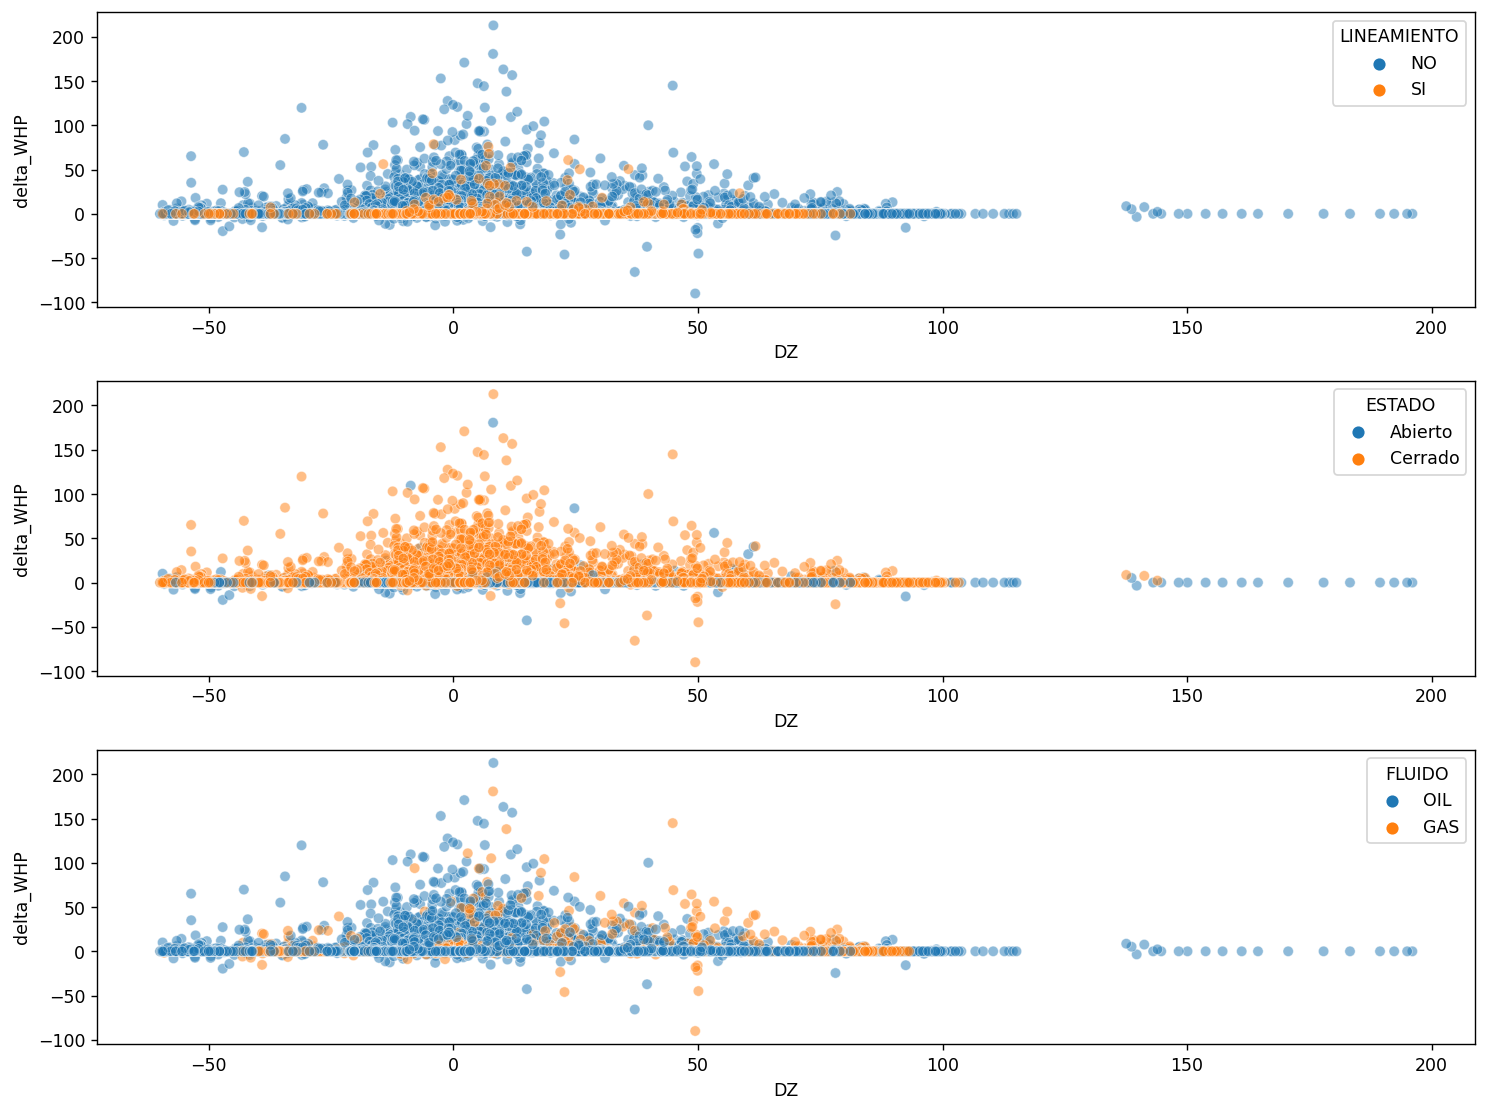

In [17]:
fig, axs = plt.subplots(nrows=3, **{"figsize": (12, 9), "dpi": 125, "facecolor": "white"})

sns.scatterplot(x='DZ', y='delta_WHP', hue="LINEAMIENTO", data=training_set, ax=axs[0], alpha=0.5)
sns.scatterplot(x='DZ', y='delta_WHP', hue="ESTADO", data=training_set, ax=axs[1], alpha=0.5)
sns.scatterplot(x='DZ',y='delta_WHP', hue="FLUIDO", data=training_set, ax=axs[2], alpha=0.5)

plt.tight_layout()

In [18]:
training_set["AZ_sin"] = training_set["AZ"].transform(lambda x: np.sin(x * (np.pi / 180)))
training_set["AZ_cos"] = training_set["AZ"].transform(lambda x: np.cos(x * (np.pi / 180)))

<AxesSubplot:xlabel='AZ_cos', ylabel='AZ_sin'>

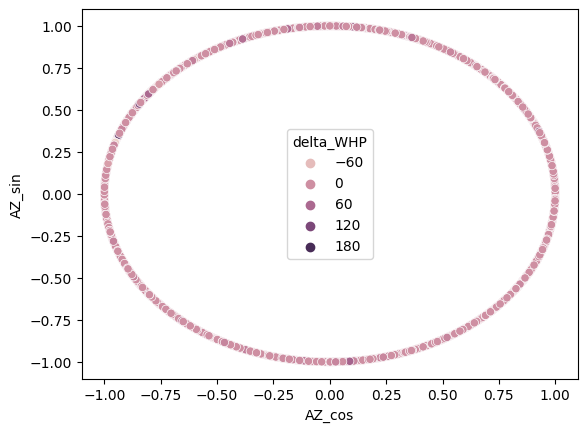

In [19]:
sns.scatterplot(
    data=training_set,
    x="AZ_cos",
    y="AZ_sin", hue="delta_WHP"
)

## Cantidad de pozos padre por hijo y viceversa

In [20]:
predictions_set = pd.read_csv(DATA_DIR / "predictions_set.csv", delimiter=",")

predictions_set_back = predictions_set.copy()

def predictions_preprocessing(df: pd.DataFrame) -> pd.DataFrame:

    df["D3D"] = df["D3D"].transform(lambda d: d.replace(",", "."))
    df["D3D"] = df["D3D"].astype(float)

    df["WHP_i"] = df["WHP_i"].transform(lambda d: d.replace(",", "."))
    df["WHP_i"] = df["WHP_i"].astype(float)

    return df

predictions_set = predictions_preprocessing(predictions_set)

In [21]:
training_set["set"] = "training"
predictions_set["set"] = "predictions"

df = pd.concat(objs=[training_set, predictions_set], axis=0, ignore_index=True)

df.head()

,ID_FILA,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,...,#_BARRERAS,LINEAMIENTO,WHP_i,delta_WHP,ESTADO,my_D3D,match,AZ_sin,AZ_cos,set
0,1,Pozo 81-Pozo 22-37,Campo D,OIL,PAD-47,Pozo 81,37,Pozo 22,1323.623144,1323.212672,...,0.0,NO,-0.2,0.0,Abierto,1323.623144,True,-0.335833,-0.941922,training
1,2,Pozo 132-Pozo 112-10,Campo C,GAS,PAD-19,Pozo 132,10,Pozo 112,1184.248919,1184.233308,...,0.0,NO,-0.1,0.0,Abierto,1184.248920,True,-0.258385,0.966042,training
2,3,Pozo 133-Pozo 112-21,Campo C,GAS,PAD-19,Pozo 133,21,Pozo 112,847.811857,847.771101,...,0.0,NO,-0.1,0.0,Abierto,847.811857,True,-0.306161,0.951980,training
3,4,Pozo 478-Pozo 122-6,Campo C,GAS,PAD-21,Pozo 478,6,Pozo 122,625.328398,625.314697,...,1.0,NO,-0.1,0.0,Abierto,625.328398,True,-0.982062,-0.188557,training
4,5,Pozo 405-Pozo 242-19,Campo F,OIL,PAD-60,Pozo 405,19,Pozo 242,1118.214531,1118.074170,...,3.0,NO,-0.1,0.0,Abierto,1118.214531,True,0.999850,-0.017330,training


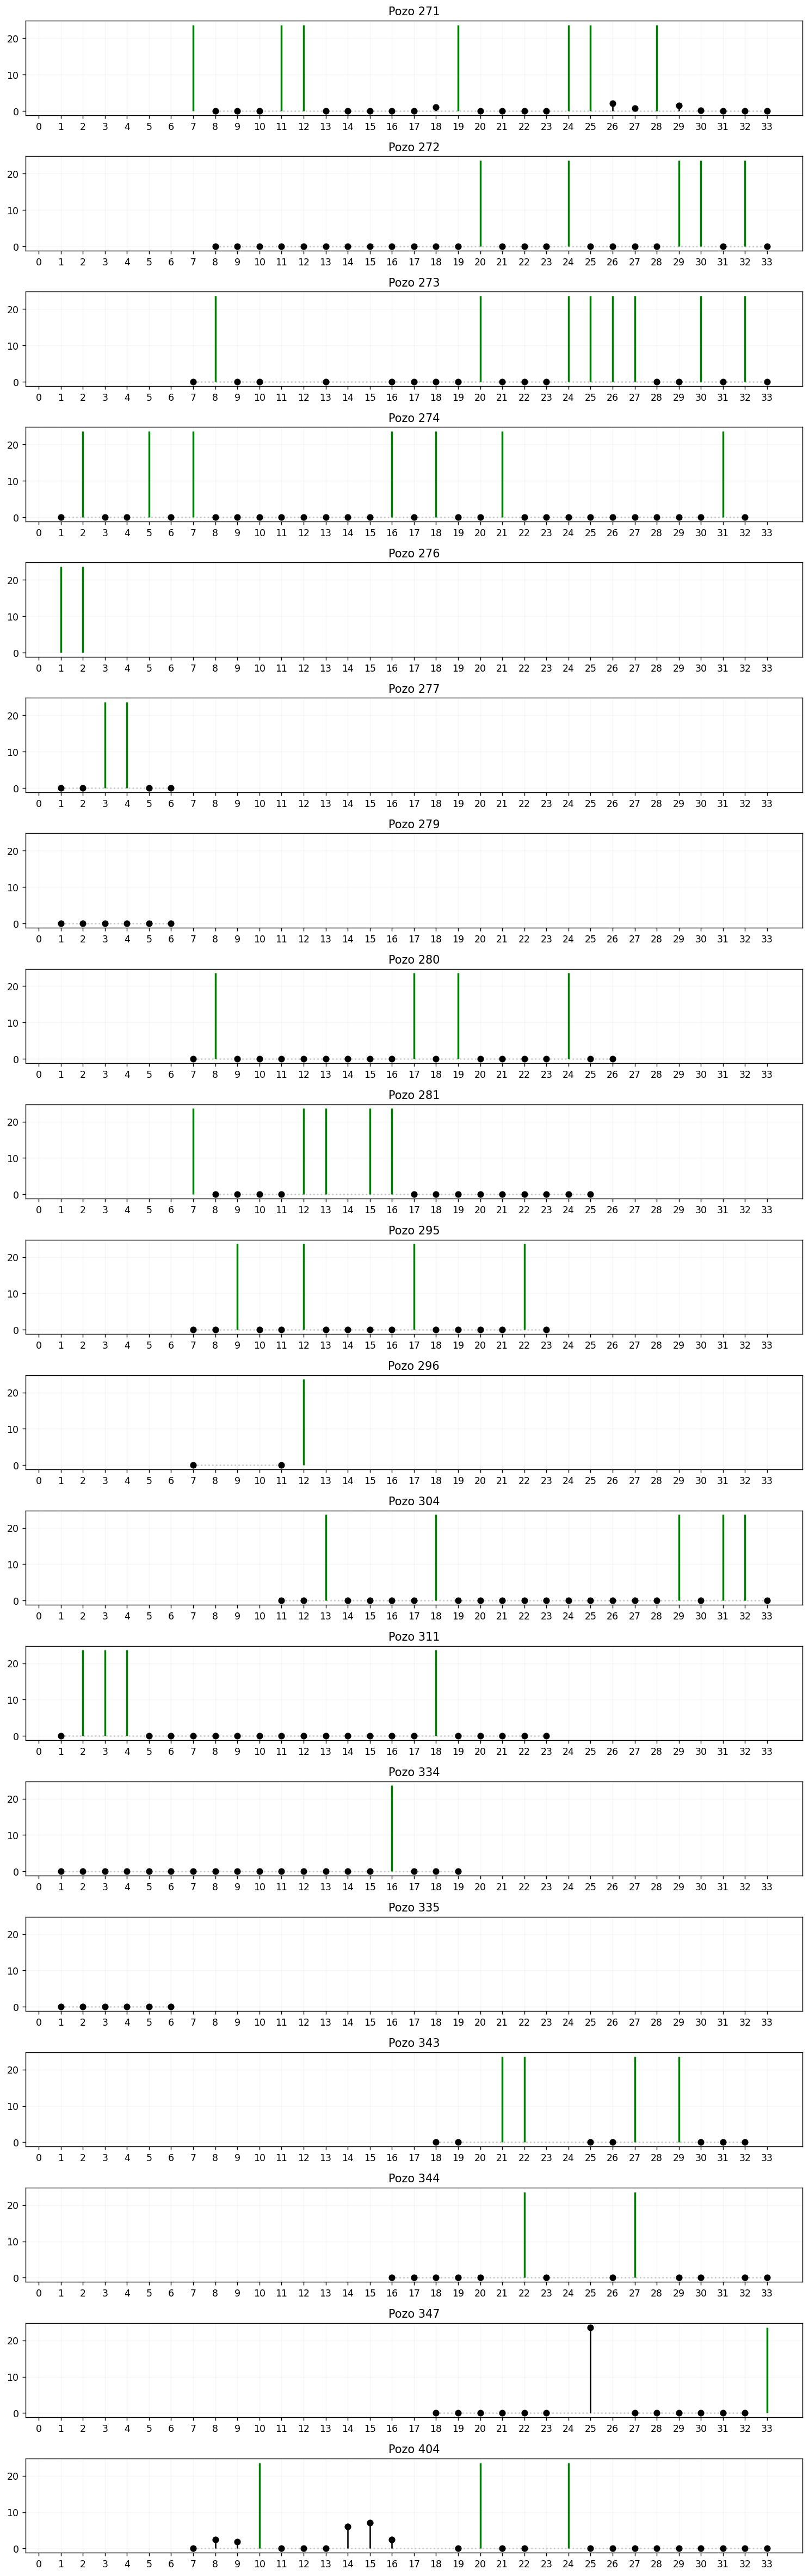

In [22]:
random_child = df[df["set"] == "training"].HIJO.sample(1).values[0]

child_events = df.loc[df.HIJO == random_child, :]

child_events = child_events.sort_values(by=["PADRE", "ETAPA_HIJO"])

nrows = len(child_events.PADRE.unique())
fig, axs = plt.subplots(
    nrows=nrows, ncols=1, sharey=True, sharex=True,
    **{"figsize": (12, 2 * nrows), "dpi": 125, "facecolor": "white"}
)

for idx, p in enumerate(child_events.PADRE.unique()):
    train_data = child_events.loc[(child_events.PADRE == p) & (child_events["set"] == "training")]
    pred_data = child_events.loc[(child_events.PADRE == p) & (child_events["set"] == "predictions")]

    ax = axs[idx]

    ax.set_title(p)

    markerline, stemlines, baseline = ax.stem(train_data["ETAPA_HIJO"], train_data["delta_WHP"], markerfmt="ko")

    baseline.set_color("black")
    baseline.set_alpha(0.2)
    baseline.set_linestyle(":")

    stemlines.set_color("black")

    ax.vlines(pred_data["ETAPA_HIJO"], ymin=0, ymax=child_events.delta_WHP.max(), color="g", linewidth=2)

    ax.grid(alpha=0.1)

    ax.tick_params(labelbottom=True)
    ax.set_xticks(np.arange(0, child_events.ETAPA_HIJO.max() + 1))

plt.tight_layout()

## Evolución de presión en padre según eventos

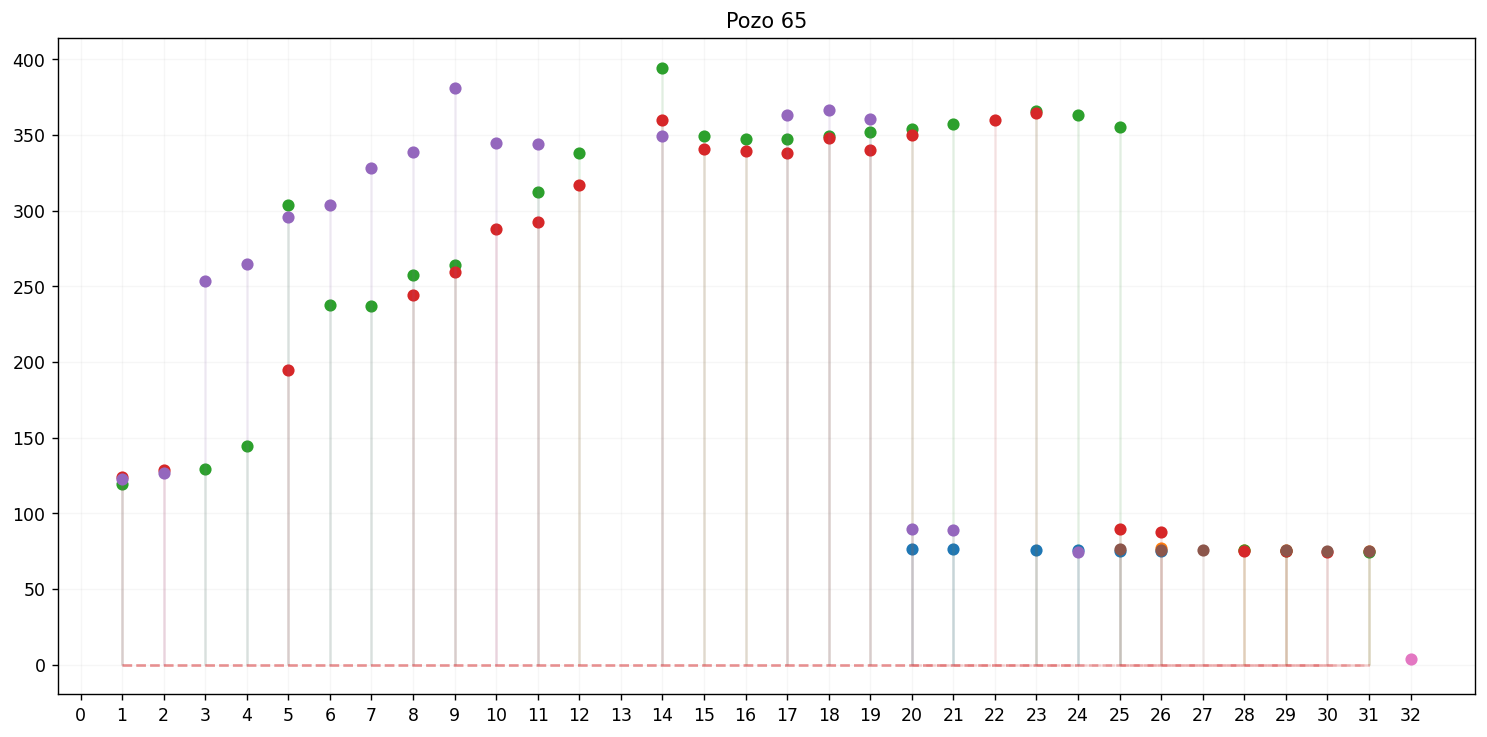

In [111]:
random_parent = df[df["set"] == "training"].PADRE.sample(1).values[0]

parent_events = df.loc[df.PADRE == random_parent, :]

parent_events = parent_events.sort_values(by=["HIJO", "ETAPA_HIJO"])

nrows = len(parent_events.HIJO.unique())

fig, ax = plt.subplots(
    nrows=1, ncols=1, sharey=True, sharex=True,
    **{"figsize": (12, 6), "dpi": 125, "facecolor": "white"}
)

for idx, h in enumerate(parent_events.HIJO.unique()):

    train_data = parent_events.loc[(parent_events.HIJO == h) & (parent_events["set"] == "training")]
    # pred_data = parent_events.loc[(parent_events.PADRE == p) & (parent_events["set"] == "predictions")]

    ax.set_title(p)

    markerline, stemlines, baseline = ax.stem(train_data["ETAPA_HIJO"], train_data["WHP_i"], markerfmt="o")

    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'alpha', 0.1)

    baseline.set_alpha(0.2)
    baseline.set_linestyle("--")

    # ax.vlines(pred_data["ETAPA_HIJO"], ymin=0, ymax=parent_events.delta_WHP.max(), color="g", linewidth=2)

    ax.grid(alpha=0.1)

    ax.tick_params(labelbottom=True)
    ax.set_xticks(np.arange(0, parent_events.ETAPA_HIJO.max() + 1))

plt.tight_layout()

## Análisis de PADs

In [34]:
training_set = pd.merge(
    left=training_set,
    right=training_set.groupby("PAD_HIJO")["HIJO"].nunique().reset_index().rename(columns={"HIJO": "HIJOS_EN_PAD"}),
    on="PAD_HIJO"
)

In [40]:
pad_metrics = (
    training_set
    .groupby("PAD_HIJO")["delta_WHP"]
    .agg(["count", "mean", "median", "std"])
    .reset_index()
)

pad_metrics.columns = ["PAD_HIJO", "PAD_EVENTOS", "PAD_delta_WHP_mean", "PAD_delta_WHP_median", "PAD_delta_WHP_mean_std"]

training_set = pd.merge(
    left=training_set,
    right=pad_metrics,
    on="PAD_HIJO"
)

training_set.head()

,ID_FILA,ID_EVENTO,CAMPO,FLUIDO,PAD_HIJO,HIJO,ETAPA_HIJO,PADRE,D3D,D2D,...,my_D3D,match,AZ_sin,AZ_cos,set,HIJOS_EN_PAD,PAD_EVENTOS,PAD_delta_WHP_mean,PAD_delta_WHP_median,PAD_delta_WHP_mean_std
0,1,Pozo 81-Pozo 22-37,Campo D,OIL,PAD-47,Pozo 81,37,Pozo 22,1323.623144,1323.212672,...,1323.623144,True,-0.335833,-0.941922,training,4,421,1.919477,0.0,6.077272
1,4815,Pozo 173-Pozo 59-35,Campo D,OIL,PAD-47,Pozo 173,35,Pozo 59,899.605568,899.064805,...,899.605568,True,0.732325,-0.680956,training,4,421,1.919477,0.0,6.077272
2,4984,Pozo 173-Pozo 59-29,Campo D,OIL,PAD-47,Pozo 173,29,Pozo 59,1170.891517,1170.404175,...,1170.891518,True,0.557004,-0.830510,training,4,421,1.919477,0.0,6.077272
3,5222,Pozo 80-Pozo 59-16,Campo D,OIL,PAD-47,Pozo 80,16,Pozo 59,1151.172280,1151.030913,...,1151.172281,True,0.697328,-0.716752,training,4,421,1.919477,0.0,6.077272
4,5254,Pozo 81-Pozo 59-30,Campo D,OIL,PAD-47,Pozo 81,30,Pozo 59,1050.531175,1050.019984,...,1050.531175,True,0.488693,-0.872456,training,4,421,1.919477,0.0,6.077272


In [49]:
pd.DataFrame(
    data=[
        pad_metrics.PAD_delta_WHP_mean.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
        pad_metrics.PAD_delta_WHP_median.describe(percentiles=[.001, .05, .1, .25, .5, .75, .9, .95, .97, .999]),
    ],
)

,count,mean,std,min,0.1%,5%,10%,25%,50%,75%,90%,95%,97%,99.9%,max
PAD_delta_WHP_mean,81.0,3.872344,5.688763,-0.4,-0.374791,0.0,0.0,0.082713,0.874528,6.444444,13.080337,15.165152,17.419362,23.866286,24.2
PAD_delta_WHP_median,81.0,1.748148,3.901430,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.800000,7.000000,8.850000,8.900000,23.424000,24.2


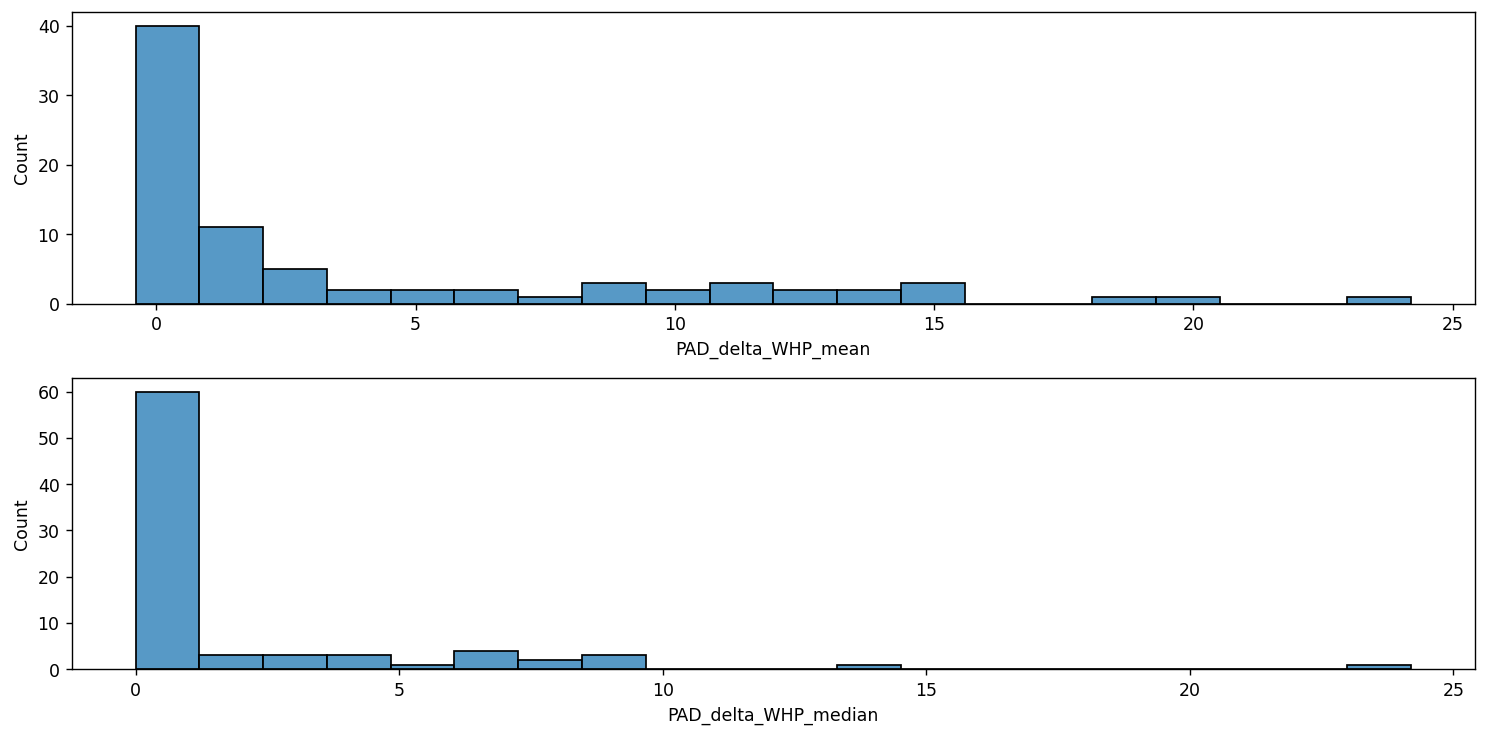

In [48]:
fig, axs = plt.subplots(nrows=2, **{"figsize": (12, 6), "dpi": 125, "facecolor": "white"})

sns.histplot(data=pad_metrics, x="PAD_delta_WHP_mean", bins=20, ax=axs[0])
sns.histplot(data=pad_metrics, x="PAD_delta_WHP_median", bins=20, ax=axs[1])

plt.tight_layout()

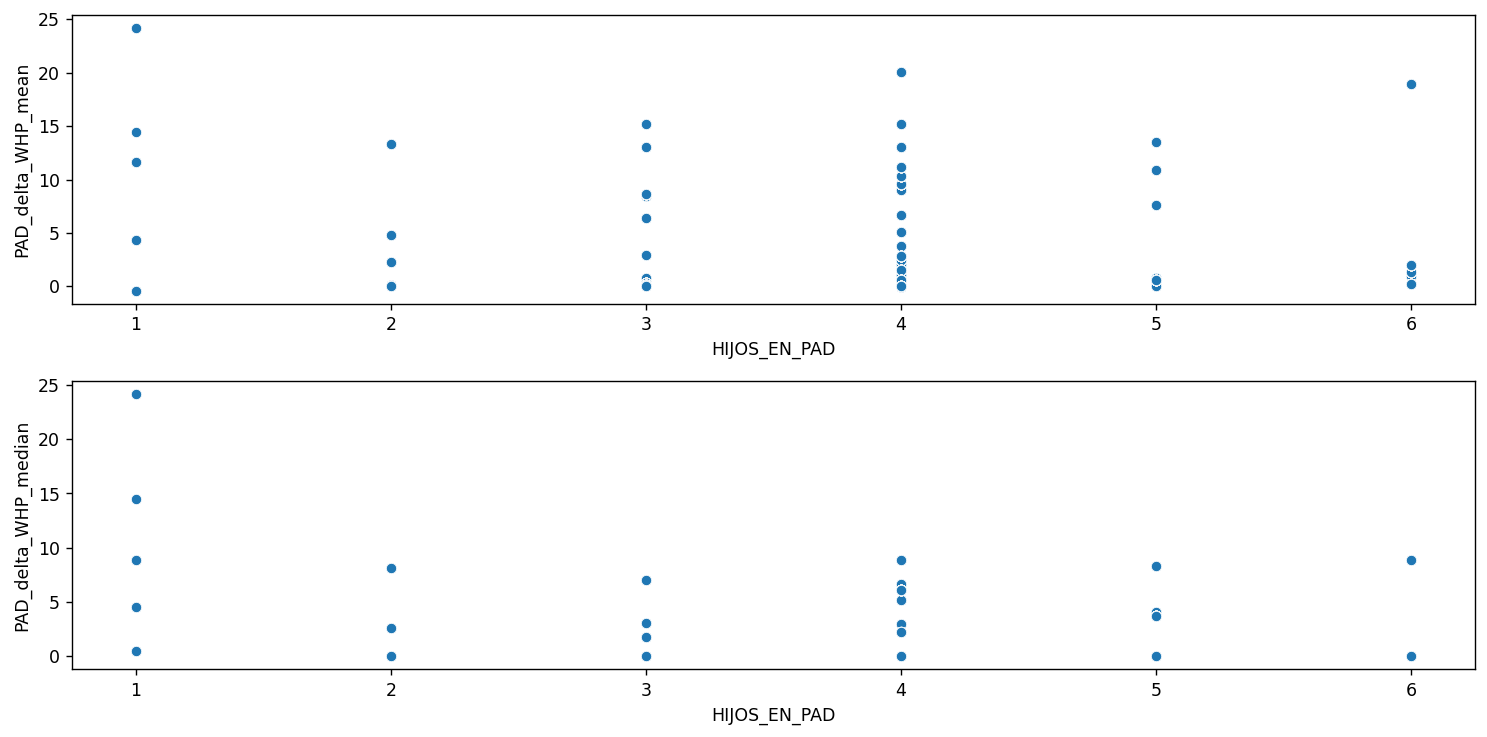

In [51]:
fig, axs = plt.subplots(nrows=2, **{"figsize": (12, 6), "dpi": 125, "facecolor": "white"})

sns.scatterplot(data=training_set, x="HIJOS_EN_PAD", y="PAD_delta_WHP_mean", ax=axs[0])
sns.scatterplot(data=training_set, x="HIJOS_EN_PAD", y="PAD_delta_WHP_median", ax=axs[1])

plt.tight_layout()